In [6]:
import numpy as np 
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter

In [2]:
ds = pd.read_csv('api_call_frequency.csv')

In [3]:
df = ds.drop(['Unnamed: 0', 'Sample Name', 'category', 'SHA256'], axis=True)

In [4]:
df.sample(10)

,label,SetErrorMode,OleInitialize,LdrGetDllHandle,LdrLoadDll,LdrGetProcedureAddress,NtOpenSection,NtMapViewOfSection,RegOpenKeyExW,RegQueryValueExW,RegCloseKey,NtClose,NtOpenKey,NtQueryValueKey,GetSystemWindowsDirectoryW,NtCreateFile,NtCreateSection,RegOpenKeyExA,CreateActCtxW,GetSystemDirectoryW,GetVolumeNameForVolumeMountPointW,NtDuplicateObject,LoadStringW,NtCreateMutant,GetNativeSystemInfo,RegEnumKeyW,NtQuerySystemInformation,RegQueryValueExA,NtQueryDirectoryFile,GlobalMemoryStatusEx,CoCreateInstance,NtAllocateVirtualMemory,CreateDirectoryW,DeleteFileW,GetFileSizeEx,NtReadFile,GetFileInformationByHandleEx,GetSystemTimeAsFileTime,GetVolumePathNamesForVolumeNameW,LdrUnloadDll,CoInitializeEx,NtOpenProcess,CoUninitialize,NtFreeVirtualMemory,NtOpenFile,NtQueryInformationFile,GetFileAttributesW,FindFirstFileExW,NtQueryAttributesFile,NtUnmapViewOfSection,SetFilePointerEx,SetFilePointer,GetTempPathW,GetFileSize,NtWriteFile,FindResourceExW,LoadResource,SHGetFolderPathW,NtProtectVirtualMemory,GetFileType,ReadProcessMemory,GetForegroundWindow,GetSystemMetrics,SetFileTime,NtSetInformationFile,SearchPathW,NtOpenMutant,RegEnumKeyExW,DrawTextExW,GetAsyncKeyState,GetDiskFreeSpaceExW,GetKeyState,FindWindowW,FindWindowExA,CreateThread,MoveFileWithProgressW,SetFileAttributesW,RemoveDirectoryW,NtTerminateProcess,CreateToolhelp32Snapshot,Process32FirstW,Process32NextW,FindWindowExW,SetEndOfFile,GetCursorPos,SetUnhandledExceptionFilter,OutputDebugStringA,GetSystemInfo,FindResourceW,SizeofResource,NtDelayExecution,GetKeyboardState,WSAStartup,socket,setsockopt,NtDeviceIoControlFile,closesocket,GetBestInterfaceEx,GetAdaptersAddresses,NtQueryKey,RegCreateKeyExW,GetAddrInfoW,GetUserNameExW,RegSetValueExW,RegDeleteValueW,InternetQueryOptionA,URLDownloadToFileW,IsDebuggerPresent,CreateProcessInternalW,GetTimeZoneInformation,LookupAccountSidW,SendNotifyMessageW,UuidCreate,GetFileVersionInfoSizeW,GetFileVersionInfoW,NtEnumerateValueKey,EnumWindows,OpenSCManagerW,GetComputerNameW,GetUserNameW,NetShareEnum,GetFileInformationByHandle,DeviceIoControl,ShellExecuteExW,RegQueryInfoKeyW,RegEnumValueW,RegDeleteKeyW,NtReadVirtualMemory,NtOpenKeyEx,NtSetValueKey,NtCreateKey,GetVolumePathNameW,GetFileAttributesExW,GetUserNameExA,RegCreateKeyExA,CryptAcquireContextW,NtEnumerateKey,NtDeleteKey,OpenServiceW,NtOpenDirectoryObject,CreateJobObjectW,SetInformationJobObject,RegEnumKeyExA,__exception__,GetShortPathNameW,LoadStringA,FindResourceA,DrawTextExA,RegQueryInfoKeyA,RegSetValueExA,SHGetSpecialFolderLocation,NtCreateThreadEx,NtResumeThread,gethostbyname,GetSystemDirectoryA,FindResourceExA,GetDiskFreeSpaceW,CertOpenStore,CryptDecodeObjectEx,CertControlStore,CryptHashData,NtOpenThread,MessageBoxTimeoutW,LookupPrivilegeValueW,CryptAcquireContextA,SetFileInformationByHandle,RemoveDirectoryA,SetWindowsHookExW,CopyFileW,GetFileVersionInfoSizeExW,GetFileVersionInfoExW,CoInitializeSecurity,WSASocketW,WSAConnect,UnhookWindowsHookEx,CertOpenSystemStoreW,getaddrinfo,InternetCrackUrlW,CoCreateInstanceEx,CoGetClassObject,IWbemServices_ExecQuery,SetStdHandle,GlobalMemoryStatus,NetGetJoinInformation,CryptCreateHash,GetComputerNameA,InternetOpenA,InternetOpenUrlA,InternetCloseHandle,ReadCabinetState,InternetOpenW,InternetConnectW,HttpOpenRequestW,HttpSendRequestW,NtDeleteValueKey,HttpQueryInfoA,RegEnumValueA,CryptProtectMemory,CreateServiceW,WriteConsoleA,CopyFileA,WriteProcessMemory,SendNotifyMessageA,RegDeleteKeyA,WriteConsoleW,JsGlobalObjectDefaultEvalHelper,ObtainUserAgentString,StartServiceW,NtQueueApcThread,RtlAddVectoredContinueHandler,CryptExportKey,CryptGenKey,CryptEncrypt,NetUserGetInfo,GetUserNameA,InternetOpenUrlW,system,GetAdaptersInfo,Module32FirstW,NtGetContextThread,Module32NextW,RtlAddVectoredExceptionHandler,NtSuspendThread,OpenSCManagerA,OpenServiceA,NtQueryMultipleValueKey,MessageBoxTimeoutA,ControlService,NtTerminateThread,EncryptMessage,DecryptMessage,DeleteService,FindWindowA,RtlRemoveVectoredExceptionHandler,ioctlsocket,connect,select,SetWindowsHookExA,Create

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X_train, X_test, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, ytrain)

importance = RF.feature_importances_

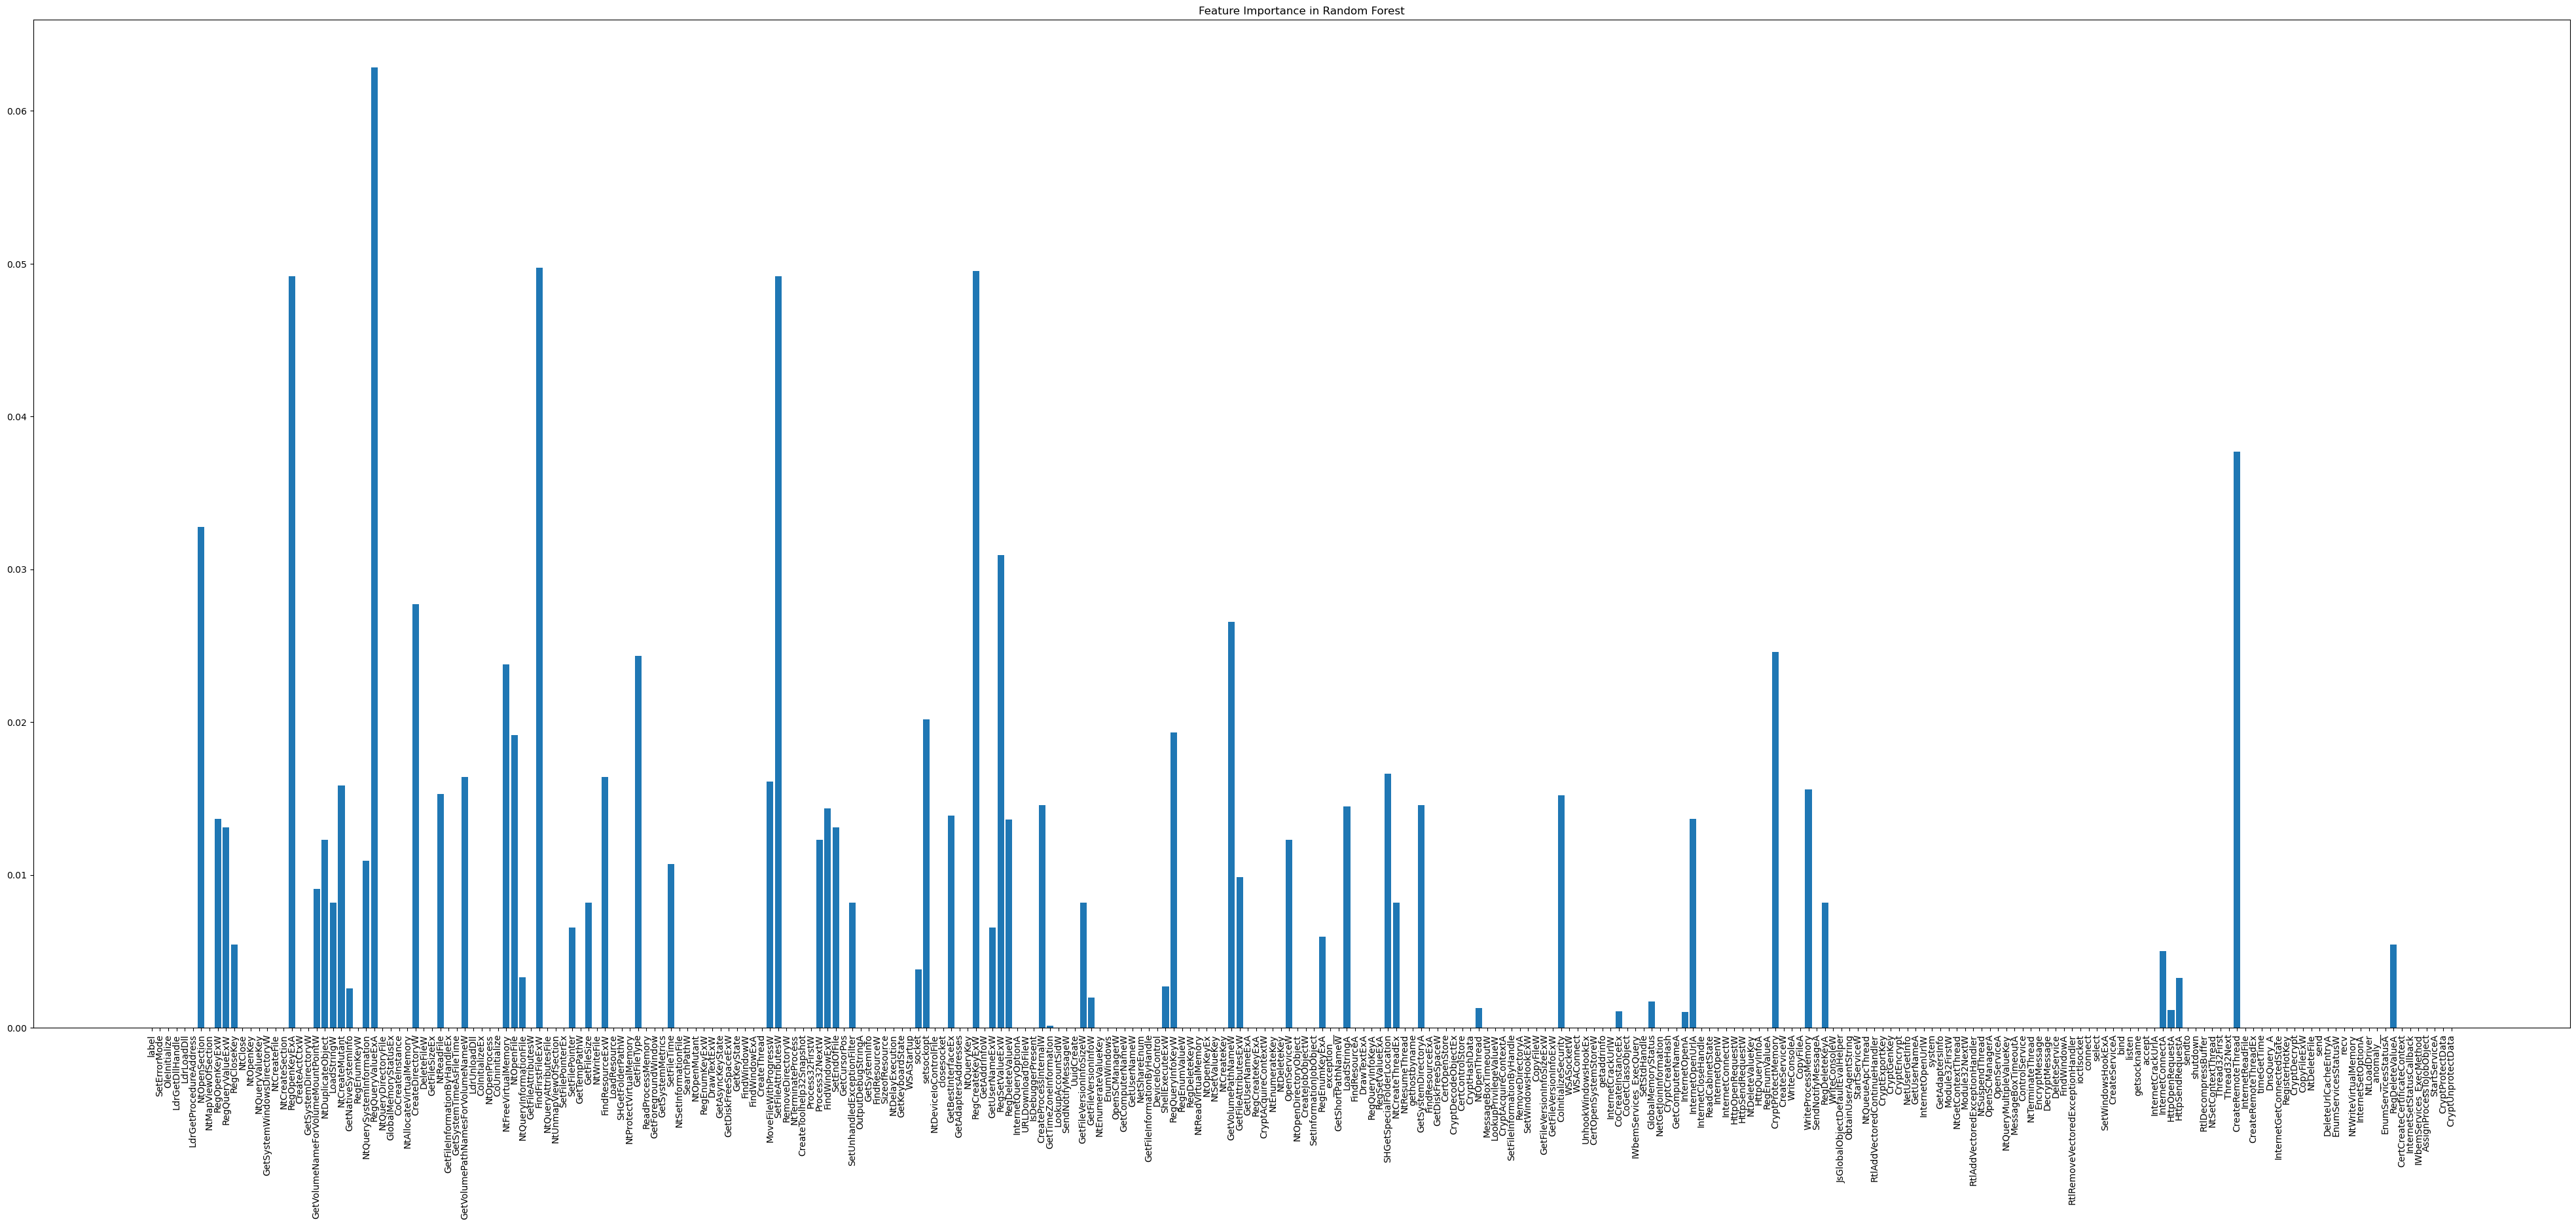

In [15]:
plt.figure(figsize=(50, 20))
plt.bar(range(X_train.shape[1]), importance)
plt.xticks(range(X_train.shape[1]), X_train.columns , rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

In [18]:
feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
top_20 = feat_df.sort_values(by='Importance', ascending=False).head(20)
print(top_20)

                              Feature  Importance
27                   RegQueryValueExA    0.062827
47                   FindFirstFileExW    0.049722
100                   RegCreateKeyExW    0.049544
17                      RegOpenKeyExA    0.049187
76                 SetFileAttributesW    0.049180
253                CreateRemoteThread    0.037693
6                       NtOpenSection    0.032787
103                    RegSetValueExW    0.030945
32                   CreateDirectoryW    0.027724
131                GetVolumePathNameW    0.026586
197                CryptProtectMemory    0.024580
59                        GetFileType    0.024357
43                NtFreeVirtualMemory    0.023789
94                         setsockopt    0.020172
124                  RegQueryInfoKeyW    0.019329
44                         NtOpenFile    0.019133
150        SHGetSpecialFolderLocation    0.016623
55                    FindResourceExW    0.016407
38   GetVolumePathNamesForVolumeNameW    0.016393
